In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Data Pre-processing

In [3]:
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [6]:
df['area'].shape

(6,)

In [9]:
df.isnull().sum(axis=0)

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [10]:
df.columns[df.isnull().any()]

Index(['bedrooms'], dtype='object')

In [12]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [14]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

# Plot

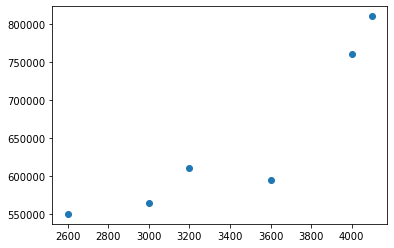

In [15]:
plt.scatter(df[['area']],df[['price']])

# Train the Model

In [19]:
housing_feature=df.iloc[:,0:2].values
housing_feature

array([[2.6e+03, 3.0e+00],
       [3.0e+03, 4.0e+00],
       [3.2e+03, 4.0e+00],
       [3.6e+03, 3.0e+00],
       [4.0e+03, 5.0e+00],
       [4.1e+03, 6.0e+00]])

In [21]:
housing_target=df['price'].values
housing_target

array([550000, 565000, 610000, 595000, 760000, 810000], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(housing_feature,housing_target,test_size=0.2,random_state=42)

# Build the Model

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [26]:
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_preds=reg.predict(X_test)

In [28]:
y_preds

array([488796.2962963 , 586975.30864198])

# Evaluate the model

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
r2_score(y_test,y_preds)

-36.58940032854076

In [31]:
np.sqrt(mean_squared_error(y_test,y_preds))

45982.64638404817